# Graph Distances
## Floyd-Warshall

Given a weighted graph, determine all sources shortest path. This means you determine the shortest distance from any vertex to any other vertex on the graph.    

Let $n$ be the number of vertices and $m$ be the number of edges of the graph.    

1. Create an adjascency matrix D[n x n] where the initial values in the table are the weights of the edges, and the missing values are all infinity.
2. Iterate $k$ over all $n$ vertices of the graph.
3. Iterate $i$ over all $n$ vertices of the graph.
4. Iterate $j$ over all $n$ vertices of the graph.
5. For each (i, j)
```
        D[i, j] = min(D[i, j], D[i, k] + D[k, j])
```
6. If at the end one of the diagonal values is negative, then the graph has a negative cycle.

Note: to also save the vertices of the path instead of just the distances, create a second P[n x n] matrix. If the value of D[i, j] is updated, also update `P[i, j] = P[k, j]`

The progress of the algorithm is shown below. Note: due to the number of steps, outputs are only shown when a value is changed in the matrix.

In [94]:
import numpy as np
import pandas as pd
import math
from math import inf
import networkx as nx
import matplotlib.pyplot as plt
import math

def style_specific_cell(df, row, col, c):
    df_styler = pd.DataFrame('', index = df.index, columns = df.columns)
    df_styler.iloc[row, col] = 'color: black;background-color: ' + c
    return df_styler


def print_paths(G, pos, options, color_nodes):
    alpha = "-abcdefghijklmnopqrstuvwxyz"
    nx.draw_networkx_labels(G, pos, {x: alpha[x] for x in G.nodes}, font_size=18, font_color="black")
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes, node_color="white", **options)
    if color_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=[color_nodes[0]], node_color="palegreen", **options)
        nx.draw_networkx_nodes(G, pos, nodelist=[color_nodes[1]], node_color="lightskyblue", **options)
        nx.draw_networkx_nodes(G, pos, nodelist=[color_nodes[2]], node_color="thistle", **options)
    #nx.draw_networkx_edges(G, pos, edgelist=path1, width=3, alpha=0.6, edge_color="red", arrowsize=25)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=3, alpha=0.5, edge_color="grey", arrowsize=25)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    ax = plt.gca()
    ax.margins(0.20)
    plt.show()

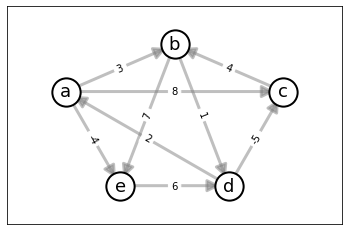

In [95]:
######################### DEFINE POINTS  #########################
# points have to be defined by (x, y) coordinates because of the way Networkx library displays graphs
points = [(1, 3), (3, 4), (5, 3), (4, 1), (2, 1)] # nodes are labeled with alphabet based on order here

# key = alphabet char of point, values = list of tuples (connected node char, weight)
adj_list = {'a': [('b', 3), ('c', 8), ('e', -4)],
            'b': [('d', 1), ('e', 7)],
            'c': [('b', 4)],
            'd': [('a', 2), ('c', -5)],
            'e': [('d', 6)] }
##########################################################################

alpha = "-abcdefghijklmnopqrstuvwxyz"
edge_list = [(c1, val[0]) for c1, vals in adj_list.items() for val in vals]
pos = {i+1: point for i, point in enumerate(points)}
options = {
    "node_size": 800,
    "edgecolors": "black",
    "linewidths": 2,
    "alpha": 1
    }
G = nx.DiGraph()
G.add_nodes_from(pos.keys())
G.add_edges_from([(alpha.index(c1), alpha.index(val[0]), {'weight': val[1]}) for c1, vals in adj_list.items() for val in vals ])

print_paths(G, pos, options, [])

Initial Table


,a,b,c,d,e
a,0,3,8,inf,-4
b,inf,0,inf,1,7
c,inf,4,0,inf,inf
d,2,inf,-5,0,inf
e,inf,inf,inf,6,0


Begin evaluating 'a' on path
i = d, k = a, j = b


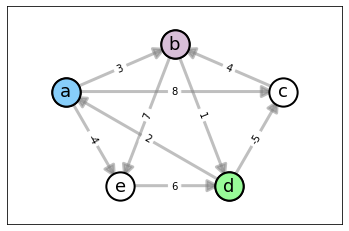

,a,b,c,d,e
a,0,3,8,inf,-4
b,inf,0,inf,1,7
c,inf,4,0,inf,inf
d,2,5,-5,0,inf
e,inf,inf,inf,6,0


i = d, k = a, j = e


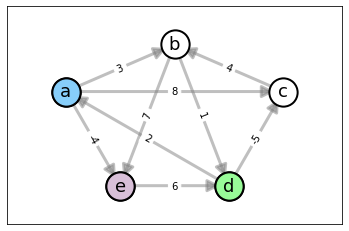

,a,b,c,d,e
a,0,3,8,inf,-4
b,inf,0,inf,1,7
c,inf,4,0,inf,inf
d,2,5,-5,0,-2
e,inf,inf,inf,6,0


-------------------------------------------
Table after evaluating 'a' on path


,a,b,c,d,e
a,0,3,8,inf,-4
b,inf,0,inf,1,7
c,inf,4,0,inf,inf
d,2,5,-5,0,-2
e,inf,inf,inf,6,0


-------------------------------------------
Begin evaluating 'b' on path
i = a, k = b, j = d


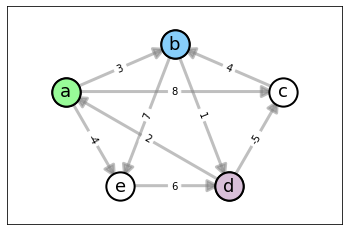

,a,b,c,d,e
a,0,3,8,4,-4
b,inf,0,inf,1,7
c,inf,4,0,inf,inf
d,2,5,-5,0,-2
e,inf,inf,inf,6,0


i = c, k = b, j = d


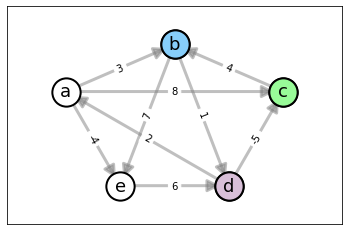

,a,b,c,d,e
a,0,3,8,4,-4
b,inf,0,inf,1,7
c,inf,4,0,5,inf
d,2,5,-5,0,-2
e,inf,inf,inf,6,0


i = c, k = b, j = e


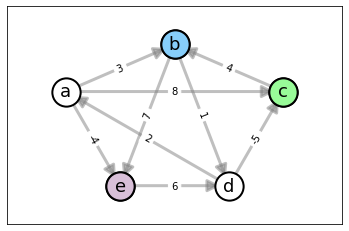

,a,b,c,d,e
a,0,3,8,4,-4
b,inf,0,inf,1,7
c,inf,4,0,5,11
d,2,5,-5,0,-2
e,inf,inf,inf,6,0


-------------------------------------------
Table after evaluating 'b' on path


,a,b,c,d,e
a,0,3,8,4,-4
b,inf,0,inf,1,7
c,inf,4,0,5,11
d,2,5,-5,0,-2
e,inf,inf,inf,6,0


-------------------------------------------
Begin evaluating 'c' on path
i = d, k = c, j = b


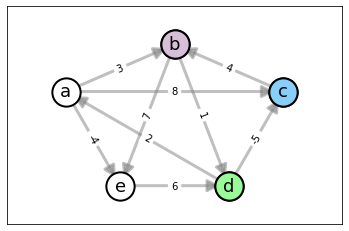

,a,b,c,d,e
a,0,3,8,4,-4
b,inf,0,inf,1,7
c,inf,4,0,5,11
d,2,-1,-5,0,-2
e,inf,inf,inf,6,0


-------------------------------------------
Table after evaluating 'c' on path


,a,b,c,d,e
a,0,3,8,4,-4
b,inf,0,inf,1,7
c,inf,4,0,5,11
d,2,-1,-5,0,-2
e,inf,inf,inf,6,0


-------------------------------------------
Begin evaluating 'd' on path
i = a, k = d, j = c


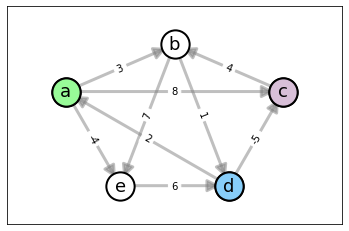

,a,b,c,d,e
a,0,3,-1,4,-4
b,inf,0,inf,1,7
c,inf,4,0,5,11
d,2,-1,-5,0,-2
e,inf,inf,inf,6,0


i = b, k = d, j = a


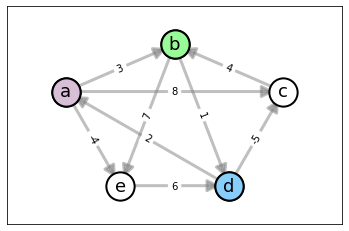

,a,b,c,d,e
a,0,3,-1,4,-4
b,3,0,inf,1,7
c,inf,4,0,5,11
d,2,-1,-5,0,-2
e,inf,inf,inf,6,0


i = b, k = d, j = c


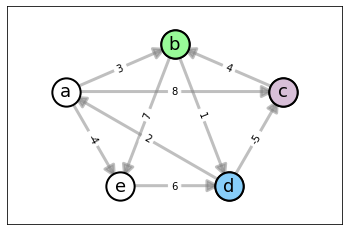

,a,b,c,d,e
a,0,3,-1,4,-4
b,3,0,-4,1,7
c,inf,4,0,5,11
d,2,-1,-5,0,-2
e,inf,inf,inf,6,0


i = b, k = d, j = e


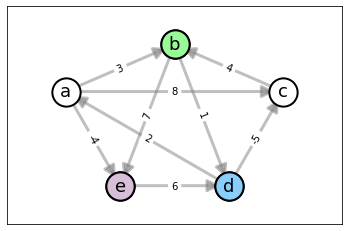

,a,b,c,d,e
a,0,3,-1,4,-4
b,3,0,-4,1,-1
c,inf,4,0,5,11
d,2,-1,-5,0,-2
e,inf,inf,inf,6,0


i = c, k = d, j = a


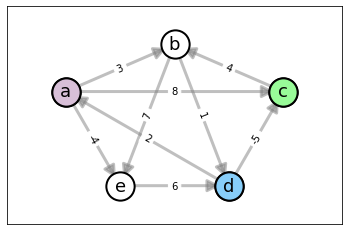

,a,b,c,d,e
a,0,3,-1,4,-4
b,3,0,-4,1,-1
c,7,4,0,5,11
d,2,-1,-5,0,-2
e,inf,inf,inf,6,0


i = c, k = d, j = e


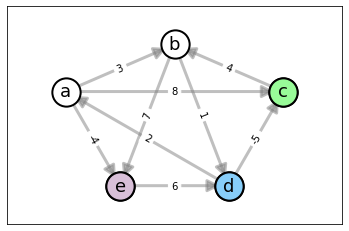

,a,b,c,d,e
a,0,3,-1,4,-4
b,3,0,-4,1,-1
c,7,4,0,5,3
d,2,-1,-5,0,-2
e,inf,inf,inf,6,0


i = e, k = d, j = a


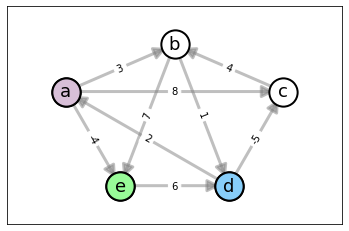

,a,b,c,d,e
a,0,3,-1,4,-4
b,3,0,-4,1,-1
c,7,4,0,5,3
d,2,-1,-5,0,-2
e,8,inf,inf,6,0


i = e, k = d, j = b


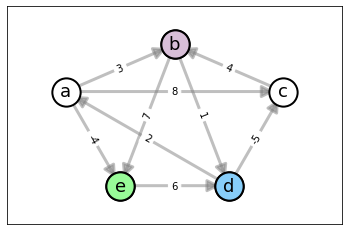

,a,b,c,d,e
a,0,3,-1,4,-4
b,3,0,-4,1,-1
c,7,4,0,5,3
d,2,-1,-5,0,-2
e,8,5,inf,6,0


i = e, k = d, j = c


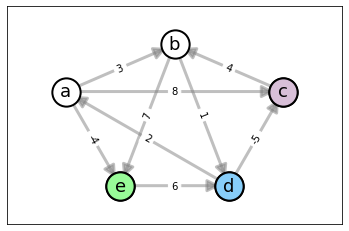

,a,b,c,d,e
a,0,3,-1,4,-4
b,3,0,-4,1,-1
c,7,4,0,5,3
d,2,-1,-5,0,-2
e,8,5,1,6,0


-------------------------------------------
Table after evaluating 'd' on path


,a,b,c,d,e
a,0,3,-1,4,-4
b,3,0,-4,1,-1
c,7,4,0,5,3
d,2,-1,-5,0,-2
e,8,5,1,6,0


-------------------------------------------
Begin evaluating 'e' on path
i = a, k = e, j = b


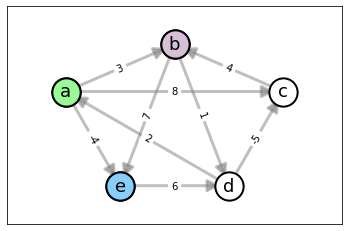

,a,b,c,d,e
a,0,1,-1,4,-4
b,3,0,-4,1,-1
c,7,4,0,5,3
d,2,-1,-5,0,-2
e,8,5,1,6,0


i = a, k = e, j = c


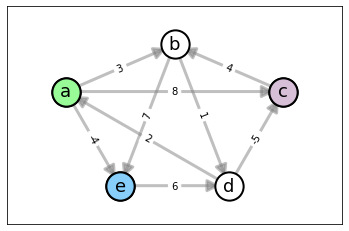

,a,b,c,d,e
a,0,1,-3,4,-4
b,3,0,-4,1,-1
c,7,4,0,5,3
d,2,-1,-5,0,-2
e,8,5,1,6,0


i = a, k = e, j = d


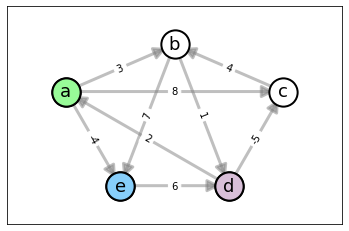

,a,b,c,d,e
a,0,1,-3,2,-4
b,3,0,-4,1,-1
c,7,4,0,5,3
d,2,-1,-5,0,-2
e,8,5,1,6,0


-------------------------------------------
Table after evaluating 'e' on path


,a,b,c,d,e
a,0,1,-3,2,-4
b,3,0,-4,1,-1
c,7,4,0,5,3
d,2,-1,-5,0,-2
e,8,5,1,6,0


-------------------------------------------
Final Table


,a,b,c,d,e
a,0,1,-3,2,-4
b,3,0,-4,1,-1
c,7,4,0,5,3
d,2,-1,-5,0,-2
e,8,5,1,6,0


In [96]:
df = pd.DataFrame(index=[alpha[i] for i in range(1, len(points)+1)],columns=[alpha[i] for i in range(1, len(points)+1)], data=math.inf)
np.fill_diagonal(df.values, 0)

backtrace = pd.DataFrame(index=[alpha[i] for i in range(1, len(points)+1)],columns=[alpha[i] for i in range(1, len(points)+1)], data=0)
np.fill_diagonal(df.values, 0)

for source, edges in adj_list.items():
    for dest, weight in edges:
        df.loc[source, dest] = weight
        backtrace.loc[source, dest] = source
print('Initial Table')
display(df.style.format(precision = 0))

for k in range(len(G.nodes)):
    print(f'Begin evaluating \'{alpha[k+1]}\' on path')
    for i in range(len(G.nodes)):
        for j in range(len(G.nodes)):
            #df.iloc[i, j] = min(df.iloc[i, j], df.iloc[i, k] + df.iloc[k, j])

            if df.iloc[i, j] > df.iloc[i, k] + df.iloc[k, j]:
                print(f"i = {alpha[i+1]}, k = {alpha[k+1]}, j = {alpha[j+1]}")
                #print_paths(G, pos, options, [(i+1, k+1), (k+1, j+1)])
                print_paths(G, pos, options, [i+1, k+1, j+1])
                df.iloc[i, j] = df.iloc[i, k] + df.iloc[k, j]
                backtrace.iloc[i, j] = backtrace.iloc[k, j]
                display(df.style.apply(style_specific_cell, row = i, col = j, c='gold', axis = None).format(precision = 0))
            #else:
            #    display(df.style.format(precision = 0))
    print(f'-------------------------------------------')
    print(f'Table after evaluating \'{alpha[k+1]}\' on path')
    display(df.style.format(precision = 0))
    print(f'-------------------------------------------')
print('Final Table')
display(df.style.format(precision = 0))

In [97]:
backtrace.replace(to_replace = 0, value = '-', inplace=True)
print("Backtrace Matrix:")
display(backtrace)

Backtrace Matrix:


,a,b,c,d,e
a,-,c,d,e,a
b,d,-,d,b,a
c,d,c,-,b,a
d,d,c,d,-,a
e,d,c,d,e,-


To get the vertices of the shortest path between any two vertices $i$ and $j$ from the backtrace matrix P:
1. Let $i$ and $j$ be the first and last vertices of the path respectively: $v_1$ = i, $v_n$ = j
2. Find the value of P[$v_1$, $v_n$] in the path matrix: $v_{n-1}$ = P[$v_1$, $v_n$]
3. Find the value of P[$v_1$, $v_{n-1}$] in the path matrix: $v_{n-2}$ = P[$v_1$, $v_{n-1}$]
4. Continue building the path until P[$v_1$, $v_{n-k}$] = $v_1$

For the matrix above, the path from $a$ to $c$ is as follows:    
P[$a$, $c$] = d    
P[$a$, $d$] = e    
P[$a$, $e$] = a       
Final path = $a, e, d, c$

## Complexity

Time complexity: $O(n^3)$ where $n$ is the number of vertices

Space complexity: $O(n^2)$ where $n$ is the number of vertices